# Capstone project
### Prediction of accidents
This jupyter notebook will be mainly used for the capstone project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#!conda install -c anaconda seaborn -y
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Exploring dataset and target the project
https://www.data.gouv.fr/en/datasets/base-de-donnees-accidents-corporels-de-la-circulation/#_

file:///C:/Users/x169021/Downloads/description-des-bases-de-donnees-onisr-annees-2005-a-2018.pdf
file:///C:/Users/x169021/Downloads/descriptif_des_variables_pour_le_fichier_de_2005_a_2010.pdf

In [3]:
df_usag = pd.read_csv("usagers-2017.csv")
df_usag = df_usag.append(pd.read_csv("usagers_2016.csv"))
df_lieux = pd.read_csv("lieux_2016.csv")
df_lieux = df_lieux.append(pd.read_csv("lieux-2017.csv"))
df_veh = pd.read_csv("vehicules_2016.csv")
df_veh = df_veh.append(pd.read_csv("vehicules-2017.csv"))

df_caract = pd.read_csv("caracteristiques_2016.csv", encoding="latin-1")
df_caract = df_caract.append(pd.read_csv("caracteristiques-2017.csv", encoding="latin-1"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("df_caract", df_caract.shape, len(df_caract.Num_Acc.unique()))
print("df_usag", df_usag.shape, len(df_usag.Num_Acc.unique()))
print("df_lieux", df_lieux.shape, len(df_lieux.Num_Acc.unique()))
print("df_veh", df_veh.shape, len(df_veh.Num_Acc.unique()))

df_caract (120133, 16) 120133
df_usag (269443, 12) 120133
df_lieux (120133, 18) 120133
df_veh (205470, 9) 120133


### We have to merge by accident

In [4]:
#merge accident with data location
df = df_caract.merge(df_lieux, on=["Num_Acc"])
#merge person with vehicle
indiv = df_usag.merge(df_veh, on=["Num_Acc","num_veh"])
#final merge
df = df.merge(indiv, on=["Num_Acc"])

Num_Acc       AxesSubplot(0.125,0.125;0.0503247x0.755)
an          AxesSubplot(0.18539,0.125;0.0503247x0.755)
mois       AxesSubplot(0.245779,0.125;0.0503247x0.755)
jour       AxesSubplot(0.306169,0.125;0.0503247x0.755)
lum        AxesSubplot(0.366558,0.125;0.0503247x0.755)
agg        AxesSubplot(0.426948,0.125;0.0503247x0.755)
int        AxesSubplot(0.487338,0.125;0.0503247x0.755)
atm        AxesSubplot(0.547727,0.125;0.0503247x0.755)
col        AxesSubplot(0.608117,0.125;0.0503247x0.755)
com        AxesSubplot(0.668506,0.125;0.0503247x0.755)
lat        AxesSubplot(0.728896,0.125;0.0503247x0.755)
long       AxesSubplot(0.789286,0.125;0.0503247x0.755)
dep        AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

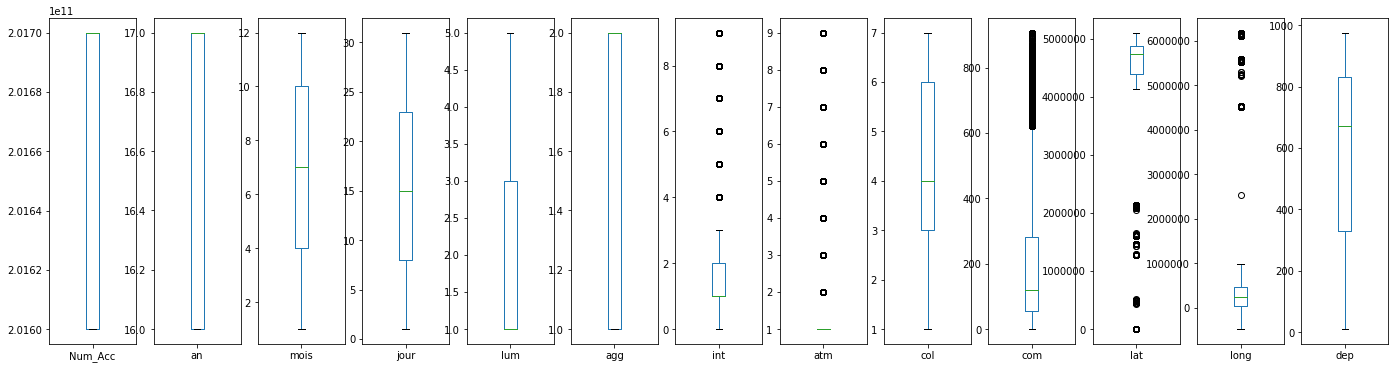

In [50]:
df_caract.plot.box(rot=0, subplots=True, figsize=(24, 6))

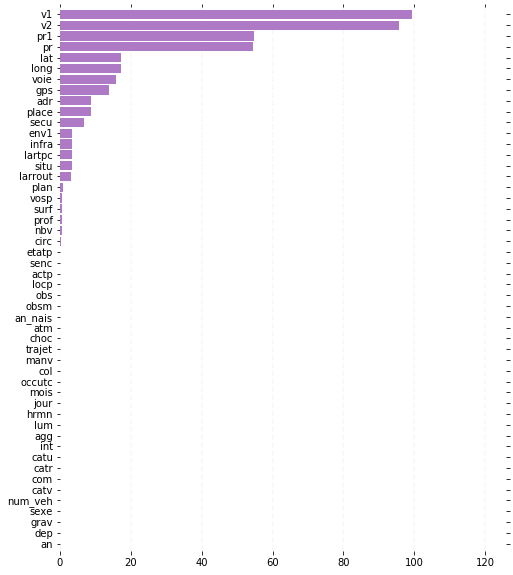

In [42]:
nan_values = df.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/269443

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")

vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

Few features are incorrectly known, we drop them

In [5]:
df = df.drop(columns = ['v1','v2',"gps","adr","secu","env1","infra",'lartpc','larrout'
                        ,'locp','etatp','actp','voie','pr1','pr','place']) #an column is the year

In [6]:
# AND we remove all row with missing data
df = df.dropna()
df.shape

(212241, 35)

In [7]:
hrmn=pd.cut(df['hrmn'],24,labels=[str(i) for i in range(0,24)])
df.hrmn=hrmn.values

In [8]:
dayofweek = pd.to_datetime("20"+df.an.astype(str)+df.mois.astype(str)+df.jour.astype(str), format='%Y%m%d').dt.dayofweek
df["dayofweek"] = dayofweek

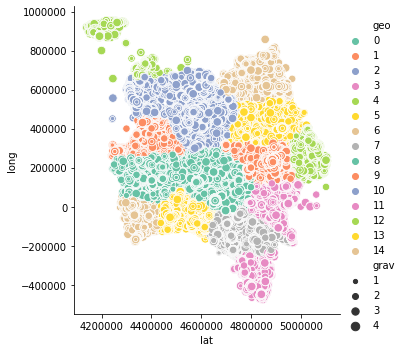

In [224]:
sns.relplot(
    data=df, x="lat", y="long",# col="an",#df.Num_Acc.astype(str)[2:4], #row='grav',
    hue="geo",# size="grav",# style="geo",
    palette="Set2"#, sizes=(10, 100)
)

In [9]:
df = df.drop(df[df.lat<3500000].index)

In [10]:
df = df.drop(df[(df.lat<4700000)&(df.long<-300000)].index)

In [11]:
df = df.drop(df[(df.lat>4990000)&(df.long>600000)].index)

In [12]:
df = df.drop(df[(df.lat<4700000)&(df.lat>4400000)&(df.long>800000)].index)

In [13]:
df = df.drop(df[(df.lat<4235000)&(df.long<800000)][["lat","long"]].index)

In [14]:
from sklearn.cluster import KMeans

#df.long = df.long.replace(0.0, np.nan)
#df.lat = df.lat.replace(0.0, np.nan)
lat = df.lat
long = df.long

X_cluster = np.array((list(zip(lat, long))))

#we define 15 areas
clustering = KMeans(n_clusters=15, random_state=0)
clustering.fit(X_cluster)

geo = pd.Series(clustering.labels_, index=df.index)
df["geo"] = geo
df.geo.value_counts()

1     59186
2     19542
10    18434
7     12237
5     11013
6     11011
8      9520
0      8651
11     8402
12     7542
9      7514
4      6607
3      6388
13     5445
14     4673
Name: geo, dtype: int64

In [15]:
df.corr().style.background_gradient(cmap='coolwarm')

In [16]:
#we remove agg because catr is correlated and give more detail with possibility of risk variability (density, velocity and more)
# and an is the year, only we are working with 2016 and 2017 and we can allow see if period of year (holidays) are relevant
df = df.drop(columns = ['agg',"an","dep"])

In [17]:
df.set_index("Num_Acc", inplace=True)

In [18]:
#we features which should not be use for prediction in our use cases
df = df.drop(columns = ['col', 'com', 'lat', 'long', 'sexe', 'num_veh', #num_veh idea to count how by veh
                        'senc', 'occutc', 'obs', 'obsm', 'choc', 'manv'])

In [237]:
df.describe()

,mois,jour,lum,int,atm,catr,circ,nbv,vosp,prof,plan,surf,situ,catu,grav,trajet,an_nais,catv,dayofweek,geo
count,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.00000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.00000
mean,6.748350,15.591961,1.886876,1.771218,1.557215,3.305197,1.894675,2.231178,0.146030,1.171351,1.182234,1.233869,1.12592,1.349660,2.506793,3.333051,1977.701629,11.743721,2.985884,5.08710
std,3.379857,8.755508,1.483710,1.566865,1.576274,1.109921,0.731329,1.309857,0.587542,0.590418,0.712935,0.873915,0.72592,0.642967,1.331918,2.651167,18.918476,10.897430,1.936301,4.22131
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1914.000000,1.000000,0.000000,0.00000
25%,4.000000,8.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1965.000000,7.000000,1.000000,1.00000
50%,7.000000,15.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,4.000000,1981.000000,7.000000,3.000000,4.00000
75%,10.000000,23.000000,3.000000,2.000000,1.000000,4.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,2.000000,4.000000,5.000000,1993.000000,10.000000,5.000000,9.00000
max,12.000000,31.000000,5.000000,9.000000,9.000000,9.000000,4.000000,13.000000,3.000000,4.000000,4.000000,9.000000,5.00000,4.000000,4.000000,9.000000,2017.000000,99.000000,6.000000,14.00000


### Now we can split categorial features we kept

In [19]:
features_cat = ['mois', 'lum', 'int', 'atm', 'catr', 'circ', 'nbv','vosp', 'prof', 'plan', 'surf',
                'situ', 'catu', 'trajet', 'catv', 'dayofweek', 'geo']

In [20]:
# one-hot encoding for categorial features
X = pd.get_dummies(df[features_cat].astype(str))
# add features of values: age, day of month
X["an_nais"]=df.an_nais
X["jour"]=df.jour

## And adjust the target of severity

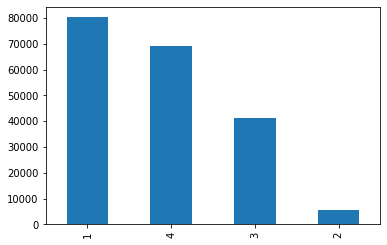

In [244]:
df.grav.value_counts().plot.bar()

In [30]:
y = df.grav
y = y.replace([1, 2, 3, 4],[0, 0, 1, 1])

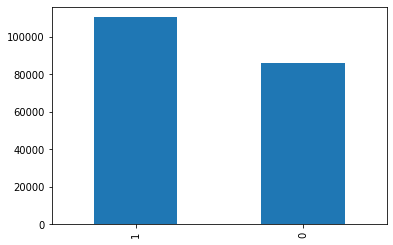

In [31]:
y.value_counts().plot.bar()

## Model construction
### Random Forest

In [35]:
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

In [37]:
# On commence par normaliser les données :

X = normalize(X.values)

# On divise la base en bases d'entraînements et de test :

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y)

# On construit le modèle :

model_rf = RandomForestClassifier(n_estimators=100, 
                                  max_depth=8
)

# L'entrînement commence :

model_rf.fit(X_train_rf, y_train_rf)

# On a maintenant les prédictions pour la base de test

predictions_test = model_rf.predict(X_test_rf)

# On calcul de même les prédictions pour la base train

predictions_train = model_rf.predict(X_train_rf)

# Les résultats sont calculés de cette manière :

train_acc = accuracy_score(y_train_rf, predictions_train)
print(train_acc)

test_acc = accuracy_score(y_test_rf, predictions_test)
print(test_acc)

0.7280642727513713
0.7272541902858775


## XGBoost

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


# On crée le modèle :

model_boosting = GradientBoostingClassifier(loss="deviance",
    learning_rate=0.2,
    max_depth=5,
    max_features="sqrt",
    subsample=0.95,
    n_estimators=200)

# L'entraînement débute :

model_boosting.fit(X_train, y_train)

# On calcul les prédictions
predictions_test_xgb = model_boosting.predict(X_test)
predictions_train_xgb = model_boosting.predict(X_train)

# On affiche les résultats :

train_acc = accuracy_score(y_train, predictions_train_xgb)
print(train_acc)

test_acc = accuracy_score(y_test, predictions_test_xgb)
print(test_acc)

0.7532540799195231
0.7399575873740876


## Comparing scores

In [41]:
# Calcul du recall pour Random Forest

recall_rf = recall_score(y_test_rf, predictions_test, average='macro')
print('Recall: %.3f' % recall_rf)

# Calcul du recall pour XGBoost

recall = recall_score(y_test, predictions_test_xgb, average='macro')
print('Recall: %.3f' % recall)

# Calcul du F1-Score pour Random Forest

f1_rf = f1_score(y_test_rf, predictions_test, average='macro')
print('F1-Score: %.3f' % f1_rf)

# Calcul du F1-Score pour XGBoost

f1 = f1_score(y_test, predictions_test_xgb, average='macro')
print('F1-Score: %.3f' % f1)

Recall: 0.726
Recall: 0.740
F1-Score: 0.724
F1-Score: 0.738


In [50]:
#! pip install treeinterpreter
#from treeinterpreter import treeinterpreter as ti
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

prediction, bias, contributions = ti.predict(model_rf, X[1000:1003])
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
i=0
for i in [0, 1]:
    for c, feature in zip(contributions[i], df.columns):
        print(feature, c)

Prediction [[0.39560567 0.60439433]
 [0.56099005 0.43900995]
 [0.56192124 0.43807876]]
Bias (trainset prior) [[0.43719724 0.56280276]
 [0.43719724 0.56280276]
 [0.43719724 0.56280276]]
Feature contributions:
mois [0. 0.]
jour [0. 0.]
hrmn [0. 0.]
lum [ 2.63022909e-05 -2.63022909e-05]
int [-6.88285984e-05  6.88285984e-05]
atm [-0.00018945  0.00018945]
catr [ 4.37063001e-05 -4.37063001e-05]
circ [-5.95932538e-05  5.95932538e-05]
nbv [-4.61616513e-05  4.61616513e-05]
vosp [-7.12501454e-05  7.12501454e-05]
prof [0. 0.]
plan [0. 0.]
surf [ 0.00716122 -0.00716122]
situ [0. 0.]
catu [ 0.00179681 -0.00179681]
grav [0. 0.]
trajet [-2.93172318e-05  2.93172318e-05]
an_nais [0. 0.]
catv [-0.00239987  0.00239987]
dayofweek [-0.00024219  0.00024219]
geo [-0.00059558  0.00059558]
mois [0. 0.]
jour [ 9.86490238e-06 -9.86490238e-06]
hrmn [ 1.23793807e-05 -1.23793807e-05]
lum [0. 0.]
int [0. 0.]
atm [0. 0.]
catr [-0.00018303  0.00018303]
circ [ 5.84731629e-05 -5.84731629e-05]
nbv [ 5.8363531e-05 -5.8363

In [48]:
X.tail()

AttributeError: 'numpy.ndarray' object has no attribute 'tail'